In [1]:
import os
os.chdir("../")

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from helpers import load_config
import warnings
warnings.filterwarnings("ignore")

configs = load_config(os.path.join("configs", "configs.yaml"))

### Using Gene2Vec-pretrained + GIT-finetuned gene embeddings to get a feature representation of each sample

In [3]:
git_data_dir = "./Dataset/git_data/data/"
# gene_emb_dir = "./Dataset/git_data/data/gene_emb_finetune.npy"
gene_emb_matrix = np.load(git_data_dir + "gene_emb_finetune.npy")
gene_emb_matrix.shape

(19782, 512)

In [4]:
with open(git_data_dir + "idx2gene.txt", "r") as f:
    idx2gene_raw = [line.strip() for line in f.readlines()]  # Index to gene name mapping

In [5]:
idx2gene = {}

for text in idx2gene_raw:
    colon_index = text.find(':')
    idx = int(text[:colon_index])
    gene = text[colon_index+2:]
    idx2gene[idx] = gene

gene2idx = {}
for idx, gene in idx2gene.items():
    gene2idx[gene] = idx


In [8]:
mutations_df = pd.read_csv(os.path.join(configs["STORAGE_DIR_STUDY2"], 'mutations_summary.csv'))
mutations_df.head()

,Tumor_Sample_Barcode,Mutation_Count,Mutations
0,TCGA-3L-AA1B-01,185,"DMBT1, C10orf90, WDFY4, PRKCQ, DYNC2H1, SPON1,..."
1,TCGA-4N-A93T-01,151,"MYO3A, ARMC4, WAC, SVIL, KIAA1462, KIAA1462, K..."
2,TCGA-4T-AA8H-01,187,"CCDC147, LRRC37A6P, PCDH15, NRBF2, PIK3AP1, SL..."
3,TCGA-5M-AAT4-01,268,"PRLHR, PRLHR, ATE1, PTCHD3, SVIL, C10ORF68, PA..."
4,TCGA-5M-AAT5-01,134,"GPR123, ARHGAP21, VSTM4, CDH23, ITIH5, OR51S1,..."


In [9]:
mutations_df.sort_values(by="Mutation_Count", ascending=False)

,Tumor_Sample_Barcode,Mutation_Count,Mutations
240,TCGA-AG-A002-01,17069,"PYROXD2, PYROXD2, HPSE2, HPSE2, CNNM1, CNNM1, ..."
301,TCGA-CA-6717-01,13582,"PYROXD2, PYROXD2, ABCC2, DNMBP, DNMBP, DNMBP, ..."
480,TCGA-F5-6814-01,13465,"R3HCC1L, HPSE2, HPSE2, GOT1, GOT1, GOT1, NKX2-..."
150,TCGA-AA-A010-01,11326,"HPSE2, HPSE2, CNNM1, GOT1, GOT1, NKX2-3, ABCC2..."
278,TCGA-AZ-4315-01,9853,"LOXL4, HPSE2, HPSE2, CNNM1, CNNM1, NKX2-3, SLC..."
...,...,...,...
212,TCGA-AG-3602-01,19,"ERN2, CASKIN2, UPF1, LIG1, SBK2, FUT3, FUT5, F..."
209,TCGA-AG-3594-01,18,"GATA3, IMP3, PLK1, ZNF423, HYDIN, JPH3, HID1, ..."
149,TCGA-AA-A00Z-01,18,"PLCE1, TRPM1, CLDN9, KRTAP17-1, SOX9, SALL3, A..."
213,TCGA-AG-3605-01,16,"FFAR4, MYOD1, NDN, NDUFB10, MPP2, PAPPA2, PLA2..."


In [10]:
def get_embedding_for_gene(gene):
    """Given gene returns embedding representation of the gene"""
    if gene in gene2idx.keys():
        idx = gene2idx[gene]
        return gene_emb_matrix[idx]
    else:
        print(f"Embedding for gene {gene} not found")
        return None


In [11]:
def compute_sample_embedding(mutated_genes_str):
    mutated_genes = mutated_genes_str.split(', ')
    embeddings = [get_embedding_for_gene(gene) for gene in mutated_genes]
    embeddings = [emb for emb in embeddings if emb is not None]  
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return None


In [12]:
mutations_df["Mutations_Emb"] = mutations_df['Mutations'].apply(compute_sample_embedding)
mutations_df.head()

Embedding for gene PRAMEF21 not found
Embedding for gene YBEY not found
Embedding for gene OOEP not found
Embedding for gene SLC52A2 not found
Embedding for gene PROK1 not found
Embedding for gene MT1P3 not found
Embedding for gene NAT8L not found
Embedding for gene FAM167A not found
Embedding for gene PROK2 not found
Embedding for gene FABP9 not found
Embedding for gene OSTF1 not found
Embedding for gene CXorf64 not found
Embedding for gene LTB4R2 not found
Embedding for gene BASP1 not found
Embedding for gene CEND1 not found
Embedding for gene IGHV1-3 not found
Embedding for gene CREB1 not found
Embedding for gene ERVFRD-1 not found
Embedding for gene FAM83H not found
Embedding for gene C10ORF68 not found
Embedding for gene SPACA4 not found
Embedding for gene RFPL4A not found
Embedding for gene CTSK not found
Embedding for gene PCP4L1 not found
Embedding for gene BRINP3 not found
Embedding for gene RP11-193H5.2 not found
Embedding for gene SYF2 not found
Embedding for gene IFI6 not f

,Tumor_Sample_Barcode,Mutation_Count,Mutations,Mutations_Emb
0,TCGA-3L-AA1B-01,185,"DMBT1, C10orf90, WDFY4, PRKCQ, DYNC2H1, SPON1,...","[-0.0019473917, -0.0018434924, -0.0041668117, ..."
1,TCGA-4N-A93T-01,151,"MYO3A, ARMC4, WAC, SVIL, KIAA1462, KIAA1462, K...","[-0.00085531804, -0.00097112654, -0.0024449977..."
2,TCGA-4T-AA8H-01,187,"CCDC147, LRRC37A6P, PCDH15, NRBF2, PIK3AP1, SL...","[-0.0018610178, -0.001306515, -0.004214902, -7..."
3,TCGA-5M-AAT4-01,268,"PRLHR, PRLHR, ATE1, PTCHD3, SVIL, C10ORF68, PA...","[-0.0019751673, -0.00034417748, -0.0032761882,..."
4,TCGA-5M-AAT5-01,134,"GPR123, ARHGAP21, VSTM4, CDH23, ITIH5, OR51S1,...","[-0.000879951, -0.0023121904, -0.0038501516, -..."


### Applying PCA over Mutations Emb

In [13]:
mutations_df[['Tumor_Sample_Barcode', 'Mutations_Emb']].head()

,Tumor_Sample_Barcode,Mutations_Emb
0,TCGA-3L-AA1B-01,"[-0.0019473917, -0.0018434924, -0.0041668117, ..."
1,TCGA-4N-A93T-01,"[-0.00085531804, -0.00097112654, -0.0024449977..."
2,TCGA-4T-AA8H-01,"[-0.0018610178, -0.001306515, -0.004214902, -7..."
3,TCGA-5M-AAT4-01,"[-0.0019751673, -0.00034417748, -0.0032761882,..."
4,TCGA-5M-AAT5-01,"[-0.000879951, -0.0023121904, -0.0038501516, -..."


In [14]:
embeddings = np.array(mutations_df["Mutations_Emb"].to_list())

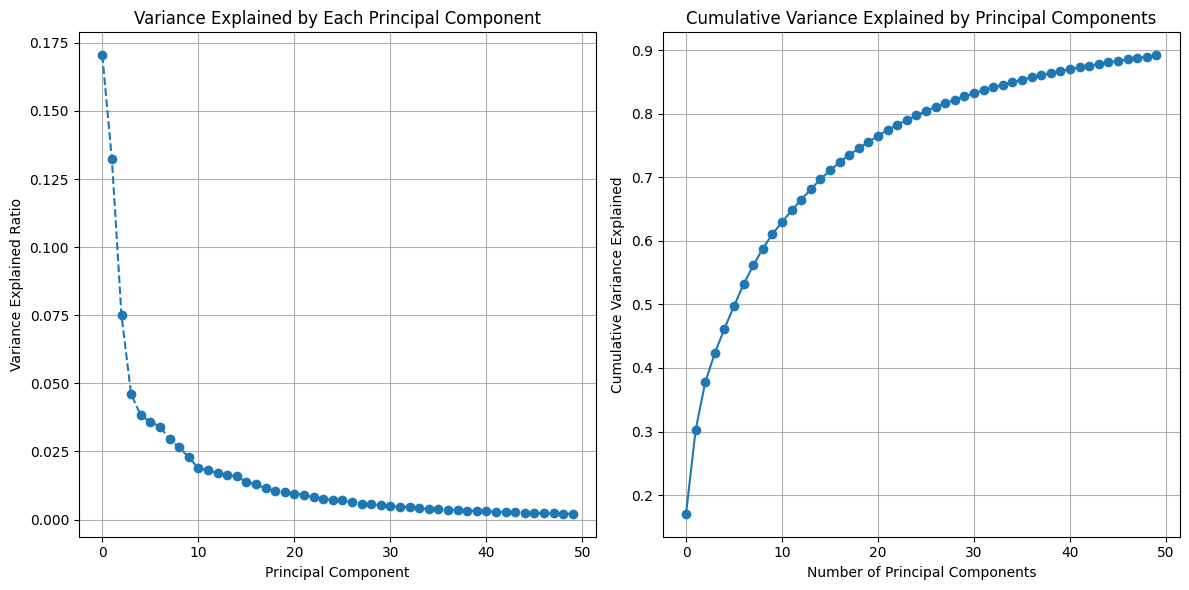

In [16]:
# Standardize the embeddings
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Perform PCA
pca = PCA()
pca.fit(embeddings_scaled)

# Plot variance explained by each principal component
plt.figure(figsize=(12, 6))

# Plot explained variance ratio of each principal component
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_[:50], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.grid(True)

# Plot cumulative variance explained
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_[:50]), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)

plt.tight_layout()
plt.show()

Elbow point occurs at 5 PCs with almost 45% VAE. 

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1704294 , 0.30260462, 0.37755248, 0.42360464, 0.46192348,
       0.4978089 , 0.5319444 , 0.5614806 , 0.5881389 , 0.6109756 ,
       0.6298731 , 0.6480217 , 0.665028  , 0.68142223, 0.69728076,
       0.71103317, 0.72401917, 0.73543537, 0.74596643, 0.75598556,
       0.7655381 , 0.77465045, 0.7827492 , 0.7902937 , 0.7976353 ,
       0.80467075, 0.81115943, 0.8168846 , 0.8225103 , 0.82776695,
       0.83267003, 0.8373566 , 0.8419292 , 0.8461681 , 0.85010487,
       0.8538969 , 0.8575396 , 0.860961  , 0.86425793, 0.86746067,
       0.8704441 , 0.8733243 , 0.87601954, 0.87863475, 0.88112426,
       0.883556  , 0.8858797 , 0.88811415, 0.8902908 , 0.8924031 ,
       0.8944581 , 0.8964688 , 0.89843243, 0.90025103, 0.9019899 ,
       0.9036951 , 0.9053202 , 0.9068638 , 0.9083924 , 0.90988606,
       0.9113529 , 0.9127935 , 0.9141948 , 0.9155403 , 0.9168779 ,
       0.91817   , 0.9194199 , 0.9206655 , 0.92187536, 0.92304057,
       0.92419565, 0.92533433, 0.9264524 , 0.92752737, 0.92858

In [18]:
n_components = 5
principal_components = pca.transform(embeddings_scaled)

first_5_pcs = principal_components[:, :n_components]
print("Shape of first 10 principal components:", first_5_pcs.shape)

storage_dir = configs["STORAGE_DIR_STUDY2"]
np.save(storage_dir + 'mutations_first_5_pcs.npy', first_5_pcs)

Shape of first 10 principal components: (528, 5)


In [19]:
principal_components = pca.transform(embeddings_scaled)

print("Shape of full principal components matrix:", principal_components.shape)

np.save(storage_dir + 'mutations_pcs.npy', principal_components)

Shape of full principal components matrix: (528, 512)
